In [229]:
import urllib.request
import pandas as pd

### Checkout-Daten über die API beziehen und als CSV-Datei speichern

In [230]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=10000"
checkout_file = "checkout.csv"
urllib.request.urlretrieve(url, checkout_file)

('checkout.csv', <http.client.HTTPMessage at 0x7f01145cf730>)

### In einen DataFrame laden und analysieren

In [231]:
checkouts_df = pd.read_csv(checkout_file)

In [232]:
checkouts_df

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2018,1,22,Enemy of the State,NaN,Vince Flynn,"Fiction, Literature, Thriller","Simon & Schuster, Inc.",2017
1,Digital,Hoopla,TELEVISION,2018,1,1,Newspaper Mom / Cucumber in Rio / Donut Raffle,NaN,NaN,Children's,DHX Media,NaN
2,Physical,Horizon,SOUNDDISC,2018,1,1,Mono / the Mavericks.,NaN,Mavericks (Musical group),Country music 2011 2020,"Valory,",[2015]
3,Digital,OverDrive,EBOOK,2018,1,2,Anna Karenina,NaN,Leo Tolstoy,"Classic Literature, Fiction, Literature","Penguin Group (USA), Inc.",2009
4,Digital,OverDrive,EBOOK,2018,1,1,"Dragon: Vlad Series, Book 8",NaN,Steven Brust,"Fantasy, Fiction",Macmillan Publishers,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Digital,OverDrive,EBOOK,2018,1,1,"Immortal: Fallen Angels Series, Book 6",NaN,J.R. Ward,"Fantasy, Fiction, Romance","Penguin Group (USA), Inc.",2014
9996,Digital,OverDrive,EBOOK,2018,1,1,The Price of Silence,NaN,Kate Wilhelm,"Fiction, Suspense, Thriller","Harlequin Enterprises, Ltd.",2011
9997,Digital,Freegal,SONG,2018,1,1,Desert Hideaway,NaN,NaN,NaN,NaN,NaN
9998,Physical,Horizon,BOOK,2018,1,3,Waistcoats & weaponry / Gail Carriger.,NaN,"Carriger, Gail","Boarding schools Fiction, Schools Fiction, Eti...","Little, Brown and Company,",2014.


## How many checkouts per usageclass?

In [233]:
checkouts_df.groupby("usageclass")

In [234]:
checkouts_df.groupby("usageclass")["checkouts"].sum()

usageclass
Digital     11207
Physical    22185
Name: checkouts, dtype: int64

<AxesSubplot:ylabel='usageclass'>

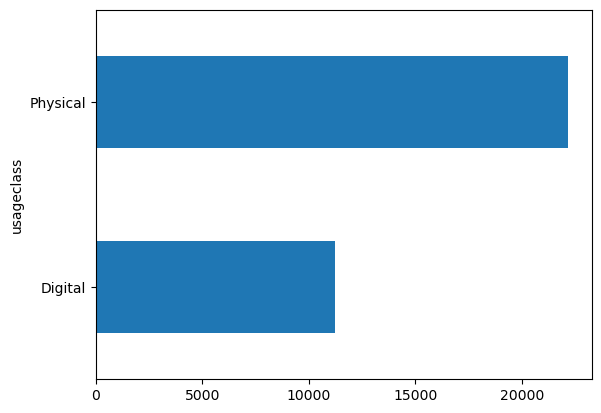

In [235]:
checkouts_df.groupby("usageclass")["checkouts"].sum().plot(kind="barh")

## Show titles in alphabetical order and output only the columns title and checkouts

In [236]:
#checkouts_df = checkouts_df.sort_values(by="title")

In [237]:
checkouts_df.sort_values("title", inplace=True)

In [238]:
checkouts_df = checkouts_df[["checkouts", "title"]]

In [239]:
print(checkouts_df)

      checkouts                                              title
2234          3                    "A" is for alibi / Sue Grafton.
8080          1  "All the real Indians died off" : and 20 other...
9508         16                                 "Awaken, My Love!"
2848          5                 "E" is for evidence / Sue Grafton.
378           5  "F" is for Fugitive: Kinsey Millhone Series, B...
...         ...                                                ...
430           1  Übel Blatt. 2 / Etorouji Shiono ; translation:...
2200          1  Čáw pawá láakni = They are not forgotten : Sah...
6670          1  Đi về phía không anh : tiểu thuyết / Trương Vũ...
2740          1  Để bạn luôn trẻ mãi : năm tháng qua đi, chúng ...
7389          1                 心理学经典实验书系：儿童心理学 (Child psychology)

[10000 rows x 2 columns]


## Show only checkouts above 20

In [240]:
checkouts_df = checkouts_df[checkouts_df["checkouts"] >20]

In [241]:
print(checkouts_df)

      checkouts                                              title
6929         22  A Darker Shade of Magic: Shades of Magic Serie...
2866         44  A place to call home. Season 4 / produced by F...
6608         23  A room with a view / Janus Films ; Goldcrest ;...
3768         29  A royal spring / by Kristen L. Depken ; illust...
8355         24  Alexander and the terrible, horrible, no good,...
...         ...                                                ...
4670         29  When's my birthday? / Julie Fogliano ; Christi...
4897         62  Where'd You Go, Bernadette: A Novel (unabridge...
6901         80  Whiskey tango foxtrot / Paramount Pictures ; a...
4607         29  Wolf Hall / a Playground Entertainment and Com...
7250         76                                             Wonder

[158 rows x 2 columns]
